In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [119]:
DATA_PATH = "../../../data/analysis_results"
validation_files = [
    "retrieval_score_for_validation_questions_using_all_MiniLM_L6_v2.csv",
    "retrieval_score_for_validation_questions_using_multi_qa_mpnet_base_dot_v1.csv",
    "retrieval_score_for_validation_questions_using_S_PubMedBert_MS_MARCO.csv"
]

test_files = [
    "retrieval_score_for_test_questions_using_all_MiniLM_L6_v2.csv",
    "retrieval_score_for_test_questions_using_multi_qa_mpnet_base_dot_v1.csv",
    "retrieval_score_for_test_questions_using_S_PubMedBert_MS_MARCO.csv"
]

model_names = [
    "all-MiniLM-L6-v2",
    "multi-qa-mpnet-base-dot-v1",
    "S-PubMedBert-MS-MARCO"
]

CHARACTERS_PER_TOKEN = 4
MAX_CHARACTERS_PER_DOCUMENT = 650
MAX_CONTEXT_TOKENS_IN_INPUT = 4000


In [118]:
tokens_per_document = MAX_CHARACTERS_PER_DOCUMENT/CHARACTERS_PER_TOKEN
tokens_per_document

162.5

In [114]:
mini_lm_df = pd.read_csv(os.path.join(DATA_PATH, validation_files[0]))
multi_qa_df = pd.read_csv(os.path.join(DATA_PATH, validation_files[1]))
pubmed_bert_df = pd.read_csv(os.path.join(DATA_PATH, validation_files[2]))


In [138]:
mini_lm_df


,question,retrieval_score,documents_retrieved,est_tokens_in_documents_retrieved
0,pancreatic cancer localizes Anatomy common hep...,0.580394,49,7962.5
1,cardiac arrest presents Symptom Hyperventilation,1.000000,1,162.5
2,anemia localizes Anatomy colostrum,1.000000,1,162.5
3,Compound Rosuvastatin treats prostate cancer,1.000000,1,162.5
4,prostate cancer localizes Anatomy epithelium,0.556150,208,33800.0
...,...,...,...,...
995,COVID-19 presents Symptom Halitosis,1.000000,1,162.5
996,"Huntington's disease presents Symptom Apraxia,...",1.000000,1,162.5
997,Compound 3-(4-Amino-2-methyl-pyrimidin-5-ylmet...,0.869789,2,325.0
998,type 2 diabetes mellitus localizes Anatomy ret...,0.000000,10000,1625000.0


In [132]:
mini_lm_df.loc[:, "est_tokens_in_documents_retrieved"] = tokens_per_document* mini_lm_df.documents_retrieved
mini_lm_thresh = mini_lm_df[mini_lm_df.est_tokens_in_documents_retrieved <= MAX_CONTEXT_TOKENS_IN_INPUT].retrieval_score.min()

multi_qa_df.loc[:, "est_tokens_in_documents_retrieved"] = tokens_per_document* multi_qa_df.documents_retrieved
multi_qa_df_thresh = multi_qa_df[multi_qa_df.est_tokens_in_documents_retrieved <= MAX_CONTEXT_TOKENS_IN_INPUT].retrieval_score.min()

pubmed_bert_df.loc[:, "est_tokens_in_documents_retrieved"] = tokens_per_document* pubmed_bert_df.documents_retrieved
pubmed_bert_df_thresh = pubmed_bert_df[pubmed_bert_df.est_tokens_in_documents_retrieved <= MAX_CONTEXT_TOKENS_IN_INPUT].retrieval_score.min()

thresholds = [
    mini_lm_thresh,
    multi_qa_df_thresh,
    pubmed_bert_df_thresh        
]

thresholds


[0.4428722360407972, 0.4092470953234909, 0.2381153545624493]

In [161]:
mini_lm_df_ = mini_lm_df[mini_lm_df.est_tokens_in_documents_retrieved <= MAX_CONTEXT_TOKENS_IN_INPUT]
mini_lm_thresh = mini_lm_df_[mini_lm_df_.est_tokens_in_documents_retrieved == mini_lm_df_.est_tokens_in_documents_retrieved.max()].retrieval_score.max()

multi_qa_df_ = multi_qa_df[multi_qa_df.est_tokens_in_documents_retrieved <= MAX_CONTEXT_TOKENS_IN_INPUT]
multi_qa_df_thresh = multi_qa_df_[multi_qa_df_.est_tokens_in_documents_retrieved == multi_qa_df_.est_tokens_in_documents_retrieved.max()].retrieval_score.max()

pubmed_bert_df_ = pubmed_bert_df[pubmed_bert_df.est_tokens_in_documents_retrieved <= MAX_CONTEXT_TOKENS_IN_INPUT]
pubmed_bert_df_thresh = pubmed_bert_df_[pubmed_bert_df_.est_tokens_in_documents_retrieved == pubmed_bert_df_.est_tokens_in_documents_retrieved.max()].retrieval_score.max()


thresholds = [
    mini_lm_thresh,
    multi_qa_df_thresh,
    pubmed_bert_df_thresh        
]

thresholds


[0.8235819529413044, 0.6966087470542819, 0.7197634329245022]

In [172]:
pubmed_bert_df_[pubmed_bert_df_.est_tokens_in_documents_retrieved == pubmed_bert_df_.est_tokens_in_documents_retrieved.max()]

# pubmed_bert_df_covid = pubmed_bert_df_[pubmed_bert_df_.question.str.contains("COVID-19")]

# pubmed_bert_df_covid[pubmed_bert_df_covid.retrieval_score >= thresholds[-1]]


,question,retrieval_score,documents_retrieved,est_tokens_in_documents_retrieved
46,breast cancer presents Symptom Vomiting,0.584300,24,3900.0
654,Gene TMPRSS15 is expressed in pancreatic cancer,0.586279,24,3900.0
659,Compound Prednisone treats hepatitis C,0.719763,24,3900.0
745,Disease bacterial pneumonia is a pneumonia,0.637008,24,3900.0


In [137]:
pubmed_bert_df[pubmed_bert_df.est_tokens_in_documents_retrieved <= MAX_CONTEXT_TOKENS_IN_INPUT].sort_values(by="retrieval_score", ascending=True)


,question,retrieval_score,documents_retrieved,est_tokens_in_documents_retrieved
330,Disease triple-receptor negative breast cancer...,0.238115,10,1625.0
404,Variant rs745318099 associates riboflavin defi...,0.386428,18,2925.0
440,Variant rs201198708 associates riboflavin defi...,0.432517,15,2437.5
685,Gene UGT2B11 is expressed in breast cancer,0.446756,23,3737.5
957,Disease glucocorticoid-induced osteoporosis is...,0.448892,2,325.0
...,...,...,...,...
623,Variant rs150164483 associates riboflavin defi...,1.000000,1,162.5
299,sickle cell anemia resembles Disease splenic i...,1.000000,1,162.5
620,type 2 diabetes mellitus localizes Anatomy sym...,1.000000,1,162.5
639,Disease classic galactosemia resembles phenylk...,1.000000,1,162.5


In [97]:
mini_lm_df = pd.read_csv(os.path.join(DATA_PATH, validation_files[0]))
multi_qa_df = pd.read_csv(os.path.join(DATA_PATH, validation_files[1]))
pubmed_bert_df = pd.read_csv(os.path.join(DATA_PATH, validation_files[2]))

print("Average retrieval score of {} = {}".format(model_names[0], round(mini_lm_df.retrieval_score.mean(), 2)))
print("Average retrieval score of {} = {}".format(model_names[1], round(multi_qa_df.retrieval_score.mean(), 2)))
print("Average retrieval score of {} = {}".format(model_names[2], round(pubmed_bert_df.retrieval_score.mean(), 2)))

thresholds = [
    mini_lm_df.retrieval_score.mean(),
    multi_qa_df.retrieval_score.mean(),
    pubmed_bert_df.retrieval_score.mean()
]




Average retrieval score of all-MiniLM-L6-v2 = 0.76
Average retrieval score of multi-qa-mpnet-base-dot-v1 = 0.78
Average retrieval score of S-PubMedBert-MS-MARCO = 0.79


In [96]:
print(mini_lm_df[mini_lm_df.retrieval_score >= mini_lm_df.retrieval_score.mean()].shape[0]/1000)

print(multi_qa_df[multi_qa_df.retrieval_score >= multi_qa_df.retrieval_score.mean()].shape[0]/1000)

print(pubmed_bert_df[pubmed_bert_df.retrieval_score >= pubmed_bert_df.retrieval_score.mean()].shape[0]/1000)


0.691
0.649
0.687


In [162]:
mini_lm_df_test = pd.read_csv(os.path.join(DATA_PATH, test_files[0]))
multi_qa_df_test = pd.read_csv(os.path.join(DATA_PATH, test_files[1]))
pubmed_bert_df_test = pd.read_csv(os.path.join(DATA_PATH, test_files[2]))


In [163]:
mini_lm_df_test[mini_lm_df_test.retrieval_score >= thresholds[0]].shape[0]/751


0.6191744340878829

In [164]:
multi_qa_df_test[multi_qa_df_test.retrieval_score >= thresholds[1]].shape[0]/751


0.7230359520639148

In [165]:
pubmed_bert_df_test[pubmed_bert_df_test.retrieval_score >= thresholds[2]].shape[0]/751


0.7310252996005326

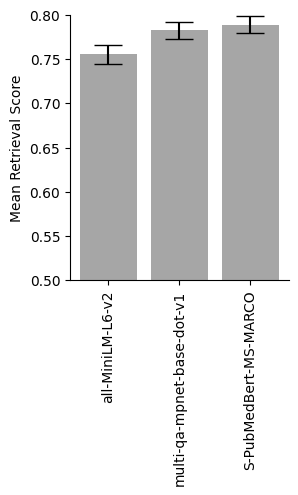

In [54]:
means = [mini_lm_df['retrieval_score'].mean(), multi_qa_df['retrieval_score'].mean(), pubmed_bert_df['retrieval_score'].mean()]
std_devs = [mini_lm_df['retrieval_score'].sem(), multi_qa_df['retrieval_score'].sem(), pubmed_bert_df['retrieval_score'].sem()]


plt.figure(figsize=(3, 5))
ax = plt.gca() 
plt.bar(model_names, means, yerr=std_devs, color='gray', alpha=0.7, capsize=10)


# plt.xlabel('Models')
plt.ylabel('Mean Retrieval Score')

plt.xticks(rotation=90)
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5, 0.8)
plt.show()

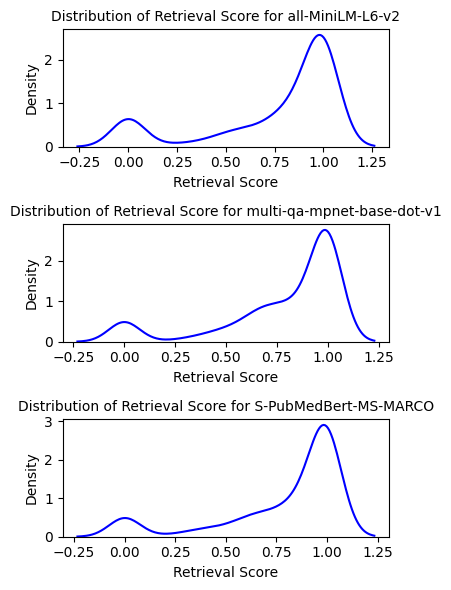

In [55]:
# Plot on validation data

fig, axes = plt.subplots(len(validation_files), 1, figsize=(4, 2 * len(validation_files)))

for i, file_name in enumerate(validation_files):    
    file_path = os.path.join(DATA_PATH, file_name)
    df = pd.read_csv(file_path)
    
    sns.kdeplot(data=df['retrieval_score'], ax=axes[i], color='blue')
    # plt.hist(df['retrieval_score'], bins=20, color='blue', alpha=0.7)
    # sns.histplot(data=df['retrieval_score'], ax=axes[i], color='blue', bins=20, kde=False)
    
    axes[i].set_xlabel('Retrieval Score')
    axes[i].set_ylabel('Density')
    
    axes[i].set_title(f'Distribution of Retrieval Score for {model_names[i]}', fontsize=10)

    # axes[i].set_xlim(0, 1)

plt.tight_layout()
plt.show()
